In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20, 10)

In [2]:
df1 = pd.read_csv("Pune_house_data.csv")
df1.head()

,area_type,availability,size,society,total_sqft,bath,balcony,price,location
0,Super built-up Area,19-Dec,2 BHK,Coomee,1056,2.0,1.0,39.07,Alandi Road
1,Plot Area,Ready To Move,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,Ambegaon Budruk
2,Built-up Area,Ready To Move,3 BHK,NaN,1440,2.0,3.0,62.00,Anandnagar
3,Super built-up Area,Ready To Move,3 BHK,Soiewre,1521,3.0,1.0,95.00,Aundh
4,Super built-up Area,Ready To Move,2 BHK,NaN,1200,2.0,1.0,51.00,Aundh Road


In [3]:
df1.shape

(13320, 9)

In [4]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [5]:
df2 = df1.drop(['area_type', 'society', 'balcony', 'availability'], axis = 'columns')
df2.head()

,size,total_sqft,bath,price,location
0,2 BHK,1056,2.0,39.07,Alandi Road
1,4 Bedroom,2600,5.0,120.00,Ambegaon Budruk
2,3 BHK,1440,2.0,62.00,Anandnagar
3,3 BHK,1521,3.0,95.00,Aundh
4,2 BHK,1200,2.0,51.00,Aundh Road


In [6]:
df2.isnull().sum()

size          16
total_sqft     0
bath          73
price          0
location       1
dtype: int64

In [7]:
df3 = df2.dropna()
df3.isnull().sum()

size          0
total_sqft    0
bath          0
price         0
location      0
dtype: int64

In [8]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [9]:
df3['bhk'] = df3['size'].apply(lambda x: int( x.split(' ')[0]))

<ipython-input-9-0285ced57897>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int( x.split(' ')[0]))


In [10]:
df3.head()

,size,total_sqft,bath,price,location,bhk
0,2 BHK,1056,2.0,39.07,Alandi Road,2
1,4 Bedroom,2600,5.0,120.00,Ambegaon Budruk,4
2,3 BHK,1440,2.0,62.00,Anandnagar,3
3,3 BHK,1521,3.0,95.00,Aundh,3
4,2 BHK,1200,2.0,51.00,Aundh Road,2


In [11]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [12]:
df3[df3.bhk > 20]

,size,total_sqft,bath,price,location,bhk
1718,27 BHK,8000,27.0,230.0,Uruli Devachi,27
4684,43 Bedroom,2400,40.0,660.0,Salunke Vihar,43


In [13]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [14]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [15]:
df3[~df3['total_sqft'].apply(is_float)]

,size,total_sqft,bath,price,location,bhk
30,4 BHK,2100 - 2850,4.0,186.000,Gultekdi,4
122,4 BHK,3067 - 8156,4.0,477.000,Ganeshkhind,4
137,2 BHK,1042 - 1105,2.0,54.005,Khadaki,2
165,2 BHK,1145 - 1340,2.0,43.490,Prabhat Road,2
188,2 BHK,1015 - 1540,2.0,56.800,Wakadewadi,2
...,...,...,...,...,...,...
12975,2 BHK,850 - 1060,2.0,38.190,Camp,2
12990,3 BHK,1804 - 2273,3.0,122.000,Gokhale Nagar,3
13059,2 BHK,1200 - 1470,2.0,72.760,Anandnagar,2
13265,2 BHK,1133 - 1384,2.0,59.135,Dapodi,2


In [16]:
def convert_sqrt_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1])) / 2
    try:
        return float(x)
    except:
        return None

In [17]:
convert_sqrt_to_num('2166')

2166.0

In [18]:
convert_sqrt_to_num('2100-2850')

2475.0

In [19]:
convert_sqrt_to_num('34.456sq. Meter')

In [20]:
df4 = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqrt_to_num)
df4.loc[13299]

size               4 BHK
total_sqft        2856.0
bath                 5.0
price              154.5
location      Laxmi Road
bhk                    4
Name: 13299, dtype: object

In [21]:
(2830+2882)/2

2856.0

In [22]:
df5 = df4.copy()
#creating a new feature price per sqft
df5['price_per_sqft'] = df5['price'] / df5['total_sqft']
df5.head()

,size,total_sqft,bath,price,location,bhk,price_per_sqft
0,2 BHK,1056.0,2.0,39.07,Alandi Road,2,0.036998
1,4 Bedroom,2600.0,5.0,120.00,Ambegaon Budruk,4,0.046154
2,3 BHK,1440.0,2.0,62.00,Anandnagar,3,0.043056
3,3 BHK,1521.0,3.0,95.00,Aundh,3,0.062459
4,2 BHK,1200.0,2.0,51.00,Aundh Road,2,0.042500


In [23]:
len(df5.location.unique())


97

In [24]:
df5.location = df5.location.apply(lambda x: x.strip())
location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending = False)
location_stats

location
Alandi Road        139
Karve Nagar        139
Paud Road          139
Ganeshkhind        139
Parvati Darshan    139
                  ... 
Shukrawar Peth     136
Satara Road        136
Model colony       136
Vadgaon Budruk     134
other                1
Name: location, Length: 97, dtype: int64

In [25]:
len(location_stats[location_stats <= 10])

1

In [26]:
location_stats_less_then_10 = location_stats[location_stats <= 10]
location_stats_less_then_10

location
other    1
Name: location, dtype: int64

In [27]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_then_10 else x)
len(df5.location.unique())

97

In [28]:
df6 = df5[~(df5.total_sqft/ df5.bhk < 300)]
df6.shape

(12502, 7)

In [29]:
df6.price_per_sqft.describe()

count    12456.000000
mean         0.063086
std          0.041681
min          0.002678
25%          0.042105
50%          0.052941
75%          0.069167
max          1.764706
Name: price_per_sqft, dtype: float64

In [30]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft > (m-st)) & (subdf.price_per_sqft <= (m + st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index= True)
        
    return df_out

df7 = remove_pps_outliers(df6)
df7.shape

(10883, 7)

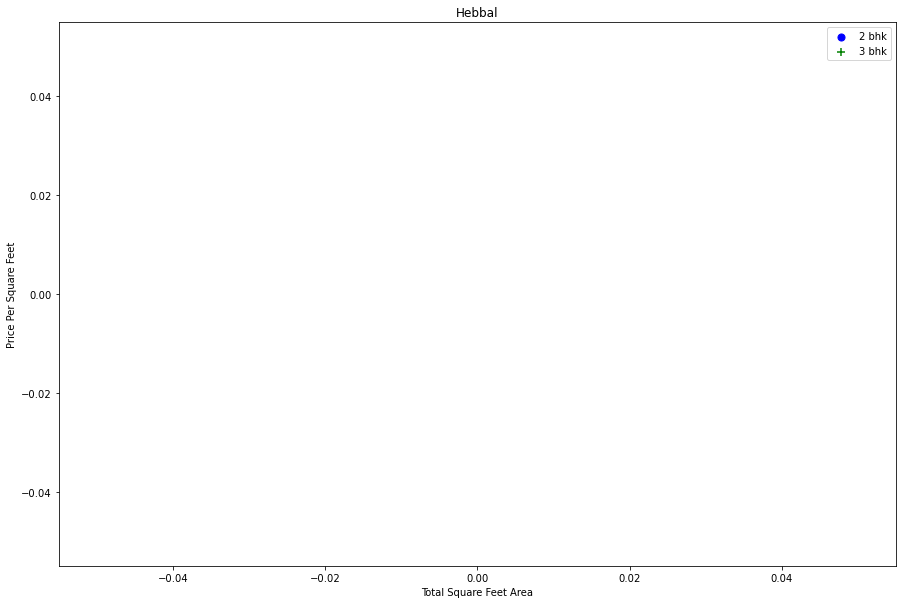

In [31]:
def plot_scatter_chart(df, location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    matplotlib.rcParams['figure.figsize'] = (15, 10)
    plt.scatter(bhk2.total_sqft, bhk2.price_per_sqft, color = 'blue', label = '2 bhk', s = 50)
    plt.scatter(bhk3.total_sqft, bhk3.price_per_sqft, marker = '+', color = 'green', label = '3 bhk', s = 50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price Per Square Feet")
    plt.title(location)
    plt.legend()

plot_scatter_chart(df7, "Hebbal")

In [32]:
def removez_bhk_outliers(df):
    exclude_indices = np.arra([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean' : np.mean(bhk_df.price_per_sqft),
                'std' : np.std(bhk_df.price_per_sqft),
                'count' : bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count'] > 5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values)
    return df.drop(exclude_indices, axis = 'index')

In [33]:
df8 = remove_pps_outliers(df7)
df8.shape

(7372, 7)

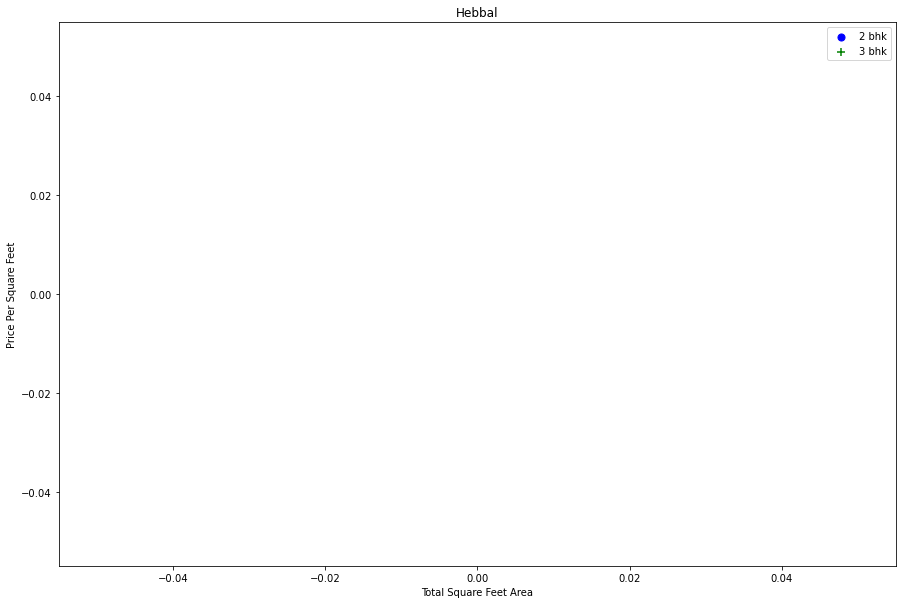

In [34]:
plot_scatter_chart(df8, "Hebbal")

Text(0, 0.5, 'Count')

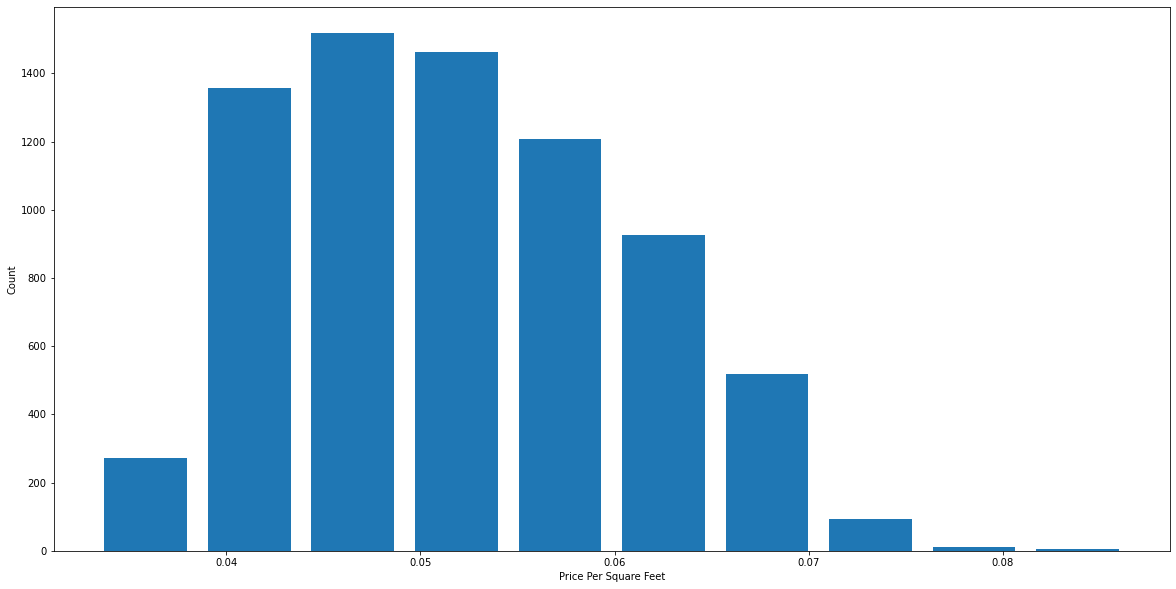

In [35]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft, rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [36]:
df8.bath.unique()

array([ 2.,  3.,  1.,  4.,  5.,  6.,  7.,  8., 12., 13., 16.,  9.])

In [37]:
df8[df8.bath > 10]

,size,total_sqft,bath,price,location,bhk,price_per_sqft
1767,10 BHK,12000.0,12.0,525.0,Fatima Nagar,10,0.043750
3541,13 BHK,5425.0,13.0,275.0,Kondhwa Khurd,13,0.050691
4267,16 BHK,10000.0,16.0,550.0,Model colony,16,0.055000
7039,10 BHK,4000.0,12.0,160.0,Wagholi,10,0.040000


Text(0, 0.5, 'Count')

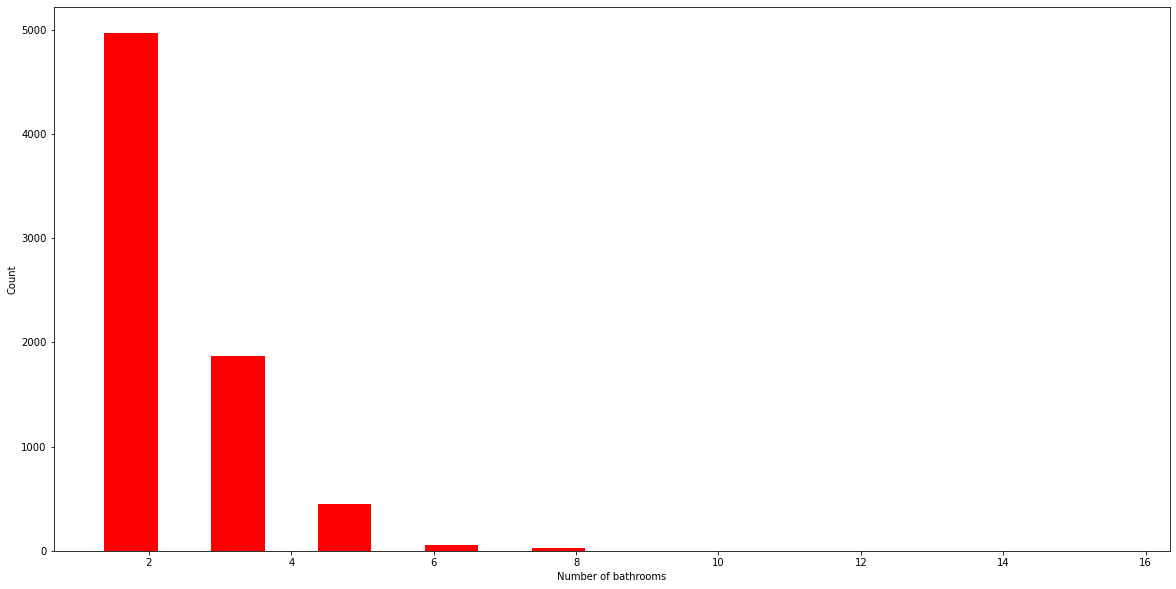

In [38]:
plt.hist(df8.bath, rwidth=0.5, color='red')
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [39]:
df8[df8.bath>df8.bhk+2]

,size,total_sqft,bath,price,location,bhk,price_per_sqft
520,3 BHK,1806.0,6.0,116.0,Baner,3,0.064230
2837,4 Bedroom,7000.0,8.0,450.0,Karve Nagar,4,0.064286


In [40]:
df9 = df8[df8.bath < df8.bhk+2]
df9.shape

(7332, 7)

In [41]:
df10 = df9.drop(['size', 'price_per_sqft'], axis='columns')
df10.head()

,total_sqft,bath,price,location,bhk
0,1084.0,2.0,50.0,Alandi Road,2
1,1230.0,2.0,80.0,Alandi Road,2
2,995.0,2.0,41.0,Alandi Road,2
3,1360.0,2.0,95.0,Alandi Road,2
4,1040.0,2.0,50.0,Alandi Road,2


In [42]:
dumies = pd.get_dummies(df10.location)

In [43]:
dumies.head()

,Alandi Road,Ambegaon Budruk,Anandnagar,Aundh,Aundh Road,Balaji Nagar,Baner,Baner road,Bhandarkar Road,Bhavani Peth,...,Uruli Devachi,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
df11 = pd.concat([df10, dumies.drop('Bhavani Peth', axis= 'columns')], axis= 'columns')

In [46]:
df12 = df11.drop('location', axis= 'columns')
df12.head()

,total_sqft,bath,price,bhk,Alandi Road,Ambegaon Budruk,Anandnagar,Aundh,Aundh Road,Balaji Nagar,...,Uruli Devachi,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada
0,1084.0,2.0,50.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1230.0,2.0,80.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,995.0,2.0,41.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1360.0,2.0,95.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1040.0,2.0,50.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
df12.shape

(7332, 99)

In [48]:
x = df12.drop('price', axis = 'columns')
x.head()

,total_sqft,bath,bhk,Alandi Road,Ambegaon Budruk,Anandnagar,Aundh,Aundh Road,Balaji Nagar,Baner,...,Uruli Devachi,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada
0,1084.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1230.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,995.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1360.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1040.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
y = df12.price
y.head()

0    50.0
1    80.0
2    41.0
3    95.0
4    50.0
Name: price, dtype: float64

In [50]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 10)

C:\Users\ADMIN\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [51]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(x_train, y_train)
lr_clf.score(x_test, y_test)

0.8892787696945709

In [52]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv= ShuffleSplit(n_splits=5, test_size= 0.2, random_state=0)
cross_val_score(LinearRegression(), x, y, cv=cv)

array([0.86199955, 0.93958889, 0.95185921, 0.90738396, 0.85072202])

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearch(x,y):
    algos = {
        'liner_regression' : {
            'model': LinearRegression(),
            'params' : {
                'normalize' : [True, False]
            }
        },
        'lasso' : {
            'model' : Lasso(),
            'params' : {
                'alpha' : [1, 2],
                'selection' : ['random', 'cyclic']
            }
        },
        'decision_tree' : {
            'model' : DecisionTreeRegressor(),
            'params' : {
                'criterion' : ['mse', 'friedman_mse'],
                'splitter' : ['best', 'random']
            }
        }
    }
    scores= []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv = cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model' : algo_name,
            'best_score' : gs.best_score_,
            'best_params' : gs.best_params_
        })
    return pd.DataFrame(scores, columns = ['model', 'best_score', 'best_params'])
find_best_model_using_gridsearch(x,y)

,model,best_score,best_params
0,liner_regression,0.902311,{'normalize': False}
1,lasso,0.901332,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.789206,"{'criterion': 'mse', 'splitter': 'random'}"


In [54]:
def predict_price(location, sqft, bath, bhk):
    loc_index= np.where(x.columns == location)[0][0]
    
    a = np.zeros(len(x.columns))
    a[0] = sqft
    a[1] = bath
    a[2] = bhk
    if loc_index >= 0:
        a[loc_index] = 1
    return lr_clf.predict([a])[0]



In [56]:
predict_price('Baner', 1000, 2,2)

49.31560506269691

In [57]:
predict_price('Warje', 1000, 2,2)

50.32393688503381

In [60]:
import pickle
with open('pune_house_prices_model.pickle', 'wb') as f:
    pickle.dump(lr_clf, f)

In [61]:
import json
columns = {
    'data_columns' : [col.lower() for col in x.columns]
}
with open("columns.json", "w") as f:
    f.write(json.dumps(columns))